In [ ]:
import warnings;
warnings.simplefilter('ignore')

In [ ]:
!git clone https://github.com/facebook/prophet.git
!cd prophet/python
!python -m pip install -e .

fatal: destination path 'prophet' already exists and is not an empty directory.
/bin/bash: line 1: cd: prophet/python: No such file or directory
Obtaining file:///content/prophet/python
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for prophet (pyproject.toml) ... done
  Created wheel for prophet: filename=prophet-1.1.5-0.editable-py3-none-linux_x86_64.whl size=4638 sha256=90fa6f0ed44ba6d4ac9616c1d478375e45aa92020abc4d79564de7f8fcda5235
  Stored in directory: /tmp/pip-ephem-wheel-cache-wu85o0s1/wheels/cd/7d/57/5764d7db20b922c884e37ce958e3288f3e867174bd6cf5ae6a
Successfully built prophet
  Attempting uninstall: prophet
    Found existing installation: prophet 1.1.5
    Uninstalling prophet-1.1.5:
      Successfully uninstalled prophet-1.1.5


In [ ]:
!pip install pystan
!pip install numpy
!pip install pandas

In [ ]:
import prophet as Prophet
import pandas as pd
df = pd.read_csv("/content/dataset.csv")

In [ ]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [ ]:
df = df.loc[(df['Product']==2667437) & (df['Store']=='QLD_CW_ST0203')]
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [ ]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


In [ ]:
from prophet import Prophet
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpt1nsz3ty/fhljljt8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt1nsz3ty/wc5ml0sp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/content/prophet/python/prophet/stan_model/prophet_model.bin', 'random', 'seed=8871', 'data', 'file=/tmp/tmpt1nsz3ty/fhljljt8.json', 'init=/tmp/tmpt1nsz3ty/wc5ml0sp.json', 'output', 'file=/tmp/tmpt1nsz3ty/prophet_modelnruithcw/prophet_model-20231219132055.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:20:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:20:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3041.771182,814.179160,4013.669498,3041.771182,3041.771182,-640.520201,-640.520201,-640.520201,468.866564,...,16.599243,16.599243,16.599243,-1125.986008,-1125.986008,-1125.986008,0.0,0.0,0.0,2401.250981
1,2018-01-02,3042.521656,923.907326,4040.978590,3042.521656,3042.521656,-650.771051,-650.771051,-650.771051,468.866564,...,-11.296388,-11.296388,-11.296388,-1108.341227,-1108.341227,-1108.341227,0.0,0.0,0.0,2391.750605
2,2018-01-03,3043.272131,766.443686,3936.226948,3043.272131,3043.272131,-625.066377,-625.066377,-625.066377,468.866564,...,-4.417865,-4.417865,-4.417865,-1089.515076,-1089.515076,-1089.515076,0.0,0.0,0.0,2418.205755
3,2018-01-04,3044.022606,596.878223,4076.133885,3044.022606,3044.022606,-578.237548,-578.237548,-578.237548,468.866564,...,22.477984,22.477984,22.477984,-1069.582096,-1069.582096,-1069.582096,0.0,0.0,0.0,2465.785058
4,2018-01-05,3044.773081,844.412327,4056.888747,3044.773081,3044.773081,-614.374860,-614.374860,-614.374860,468.866564,...,-34.571885,-34.571885,-34.571885,-1048.669539,-1048.669539,-1048.669539,0.0,0.0,0.0,2430.398221


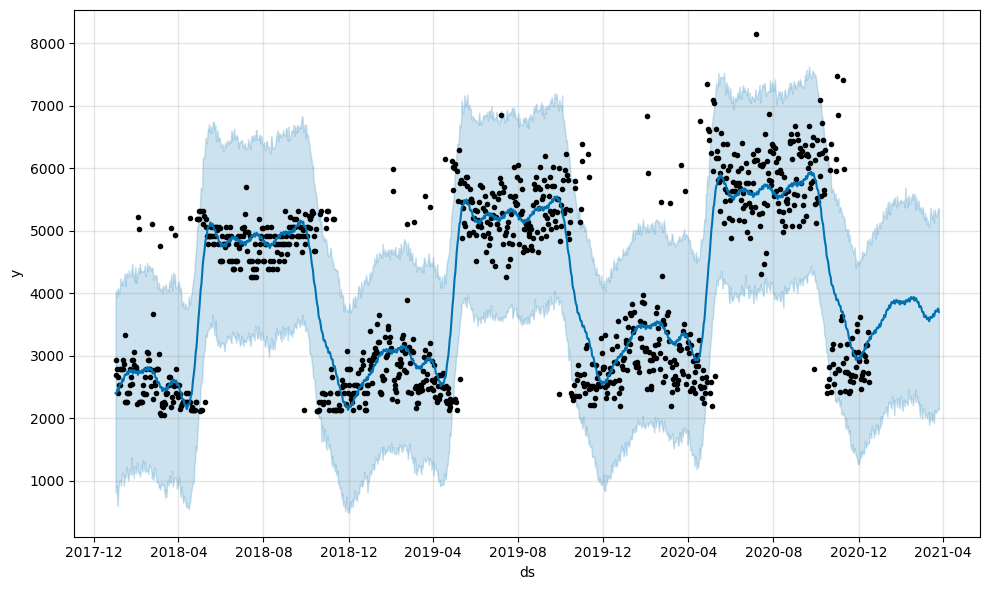

In [ ]:
plot1 = m.plot(forecast)

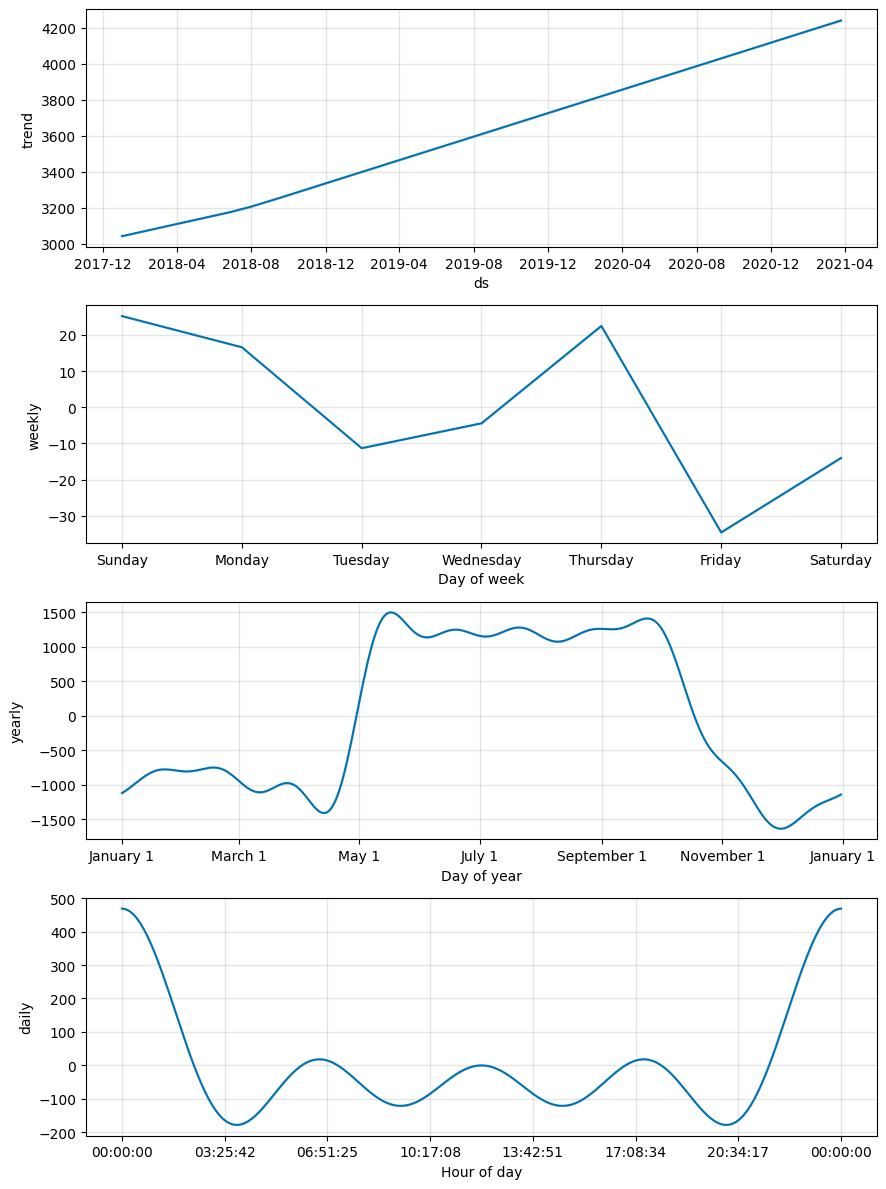

In [ ]:
plt2 = m.plot_components(forecast)